# Статистика, DS-поток
## Практическое задание 5


**Правила:**

* Дедлайн **11 октября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  120 баллов
* Задача 2 &mdash;  100 баллов
* Задача 3 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 2;
* *средне-высокая:* задача 3.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')

%matplotlib inline

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** $$\textrm{bias}_{\widehat{\theta}}(\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta = \mathsf{E}_{\theta} c X_{(n)} - \theta = c \cdot \mathsf{E}_{\theta} X_{(n)} - \theta = c \cdot \theta \frac{n}{n + 1} - \theta = \theta (\frac{c n}{n + 1} - 1)$$

$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta} = \mathsf{D}_{\theta} cX_{(n)} = c ^ 2 \cdot \mathsf{D}_{\theta} X_{(n)} = \frac{c^2 \theta^2 n}{(n + 1)^2 (n + 2)}$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

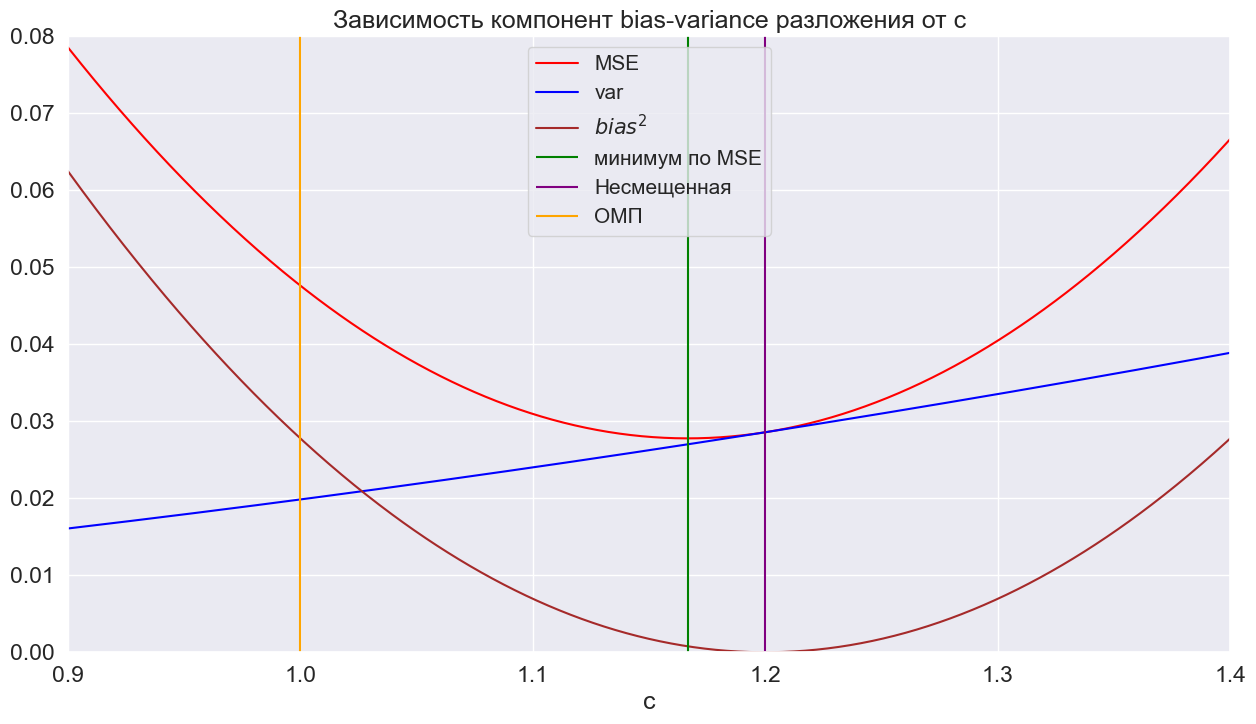

In [2]:
n = 5
theta = 1

grid_c = np.linspace(0.9, 1.5, 1000)
bias = theta * (grid_c * n / (n + 1) - 1)
var = grid_c**2 * theta**2 * n / ((n + 1)**2 * (n + 2))
mse = bias**2 + var

plt.figure(figsize=(15, 8))
plt.plot(grid_c, mse, color = 'red', label = 'MSE')
plt.plot(grid_c, var, color = 'blue', label = 'var')
plt.plot(grid_c, bias**2, color = 'brown', label = '$bias^2$')
plt.vlines(grid_c[np.argmin(mse)], 0, 1, color = 'green', label = 'минимум по MSE')
plt.vlines((n + 1) / n, 0, 1, color='purple', label = 'Несмещенная')
plt.vlines(1, 0, 1, color='orange', label = 'ОМП')
plt.xlim(0.9, 1.4)
plt.ylim(0, 0.08)
plt.xlabel('c')
plt.title('Зависимость компонент bias-variance разложения от c')
plt.legend(fontsize=15);

In [3]:
print(grid_c[np.argmin(mse)]) # значение минимума по MSE

1.1666666666666667


**Вывод:** Видно, что компоенты B-V разложения квадратично зависят от $\theta$. Также видно, что миниму по MSE и несмещенная оценка и ОМП не совпадают. Несмещенная находится ближе к MSE, чем ОМП.

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** Фото прикрепил к заданию.

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

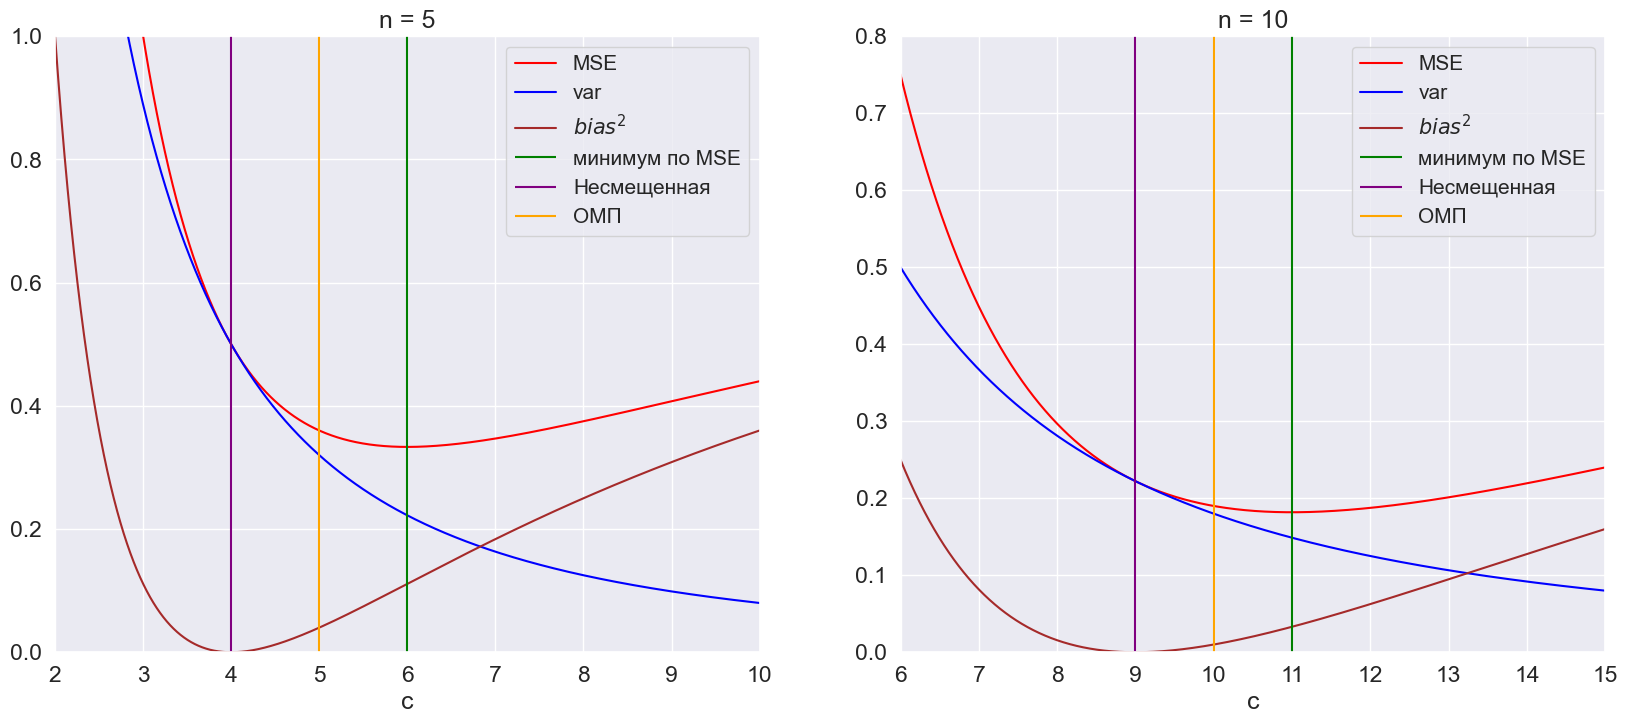

In [4]:
a = 0
sigma_2 = 1
n = np.array([5, 10])
grid_c = np.linspace(1, 16, 10000)
xlim = [(2, 10), (6, 15)]
ylim = [(0, 1), (0, 0.8)]

plt.figure(figsize=(20, 8))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    bias = sigma_2 * ((n[i] - 1) / grid_c - 1)
    var = 2 * (n[i] - 1) * sigma_2**2 / grid_c**2
    mse = bias**2 + var
    
    plt.plot(grid_c, mse, color = 'red', label = 'MSE')
    plt.plot(grid_c, var, color = 'blue', label = 'var')
    plt.plot(grid_c, bias**2, color = 'brown', label = '$bias^2$')
    plt.vlines(grid_c[np.argmin(mse)], 0, 1, color = 'green', label = 'минимум по MSE')
    plt.vlines(n[i] - 1, 0, 1, color='purple', label = 'Несмещенная')
    plt.vlines(n[i], 0, 1, color='orange', label = 'ОМП')
    plt.ylim(ylim[i])
    plt.xlim(xlim[i])
    plt.xlabel('c')
    plt.title('n = {}'.format(n[i]))
    plt.legend(fontsize=15)

**Вывод:** Как и в предыдущем случае обе компоненты разложения квадратично зависят от $\theta$. Видно, что минимум по MSE достигается при $c = n + 1$, несмещенная - при $c = n - 1$ и ОМП - при $c = n$. Также видно, что здесь ОМП ближе к оценке при минимуме MSE, чем несмещенная.

*c).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $Exp (\theta)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{c_n}{X_1 + \dots + X_n}, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** Фото прикрепил к заданию.

Повторите исследование, аналогичное пункту *c)* для $\theta = 1$ и $n = 7$. Не забудьте сделать выводы.

**Решение:**

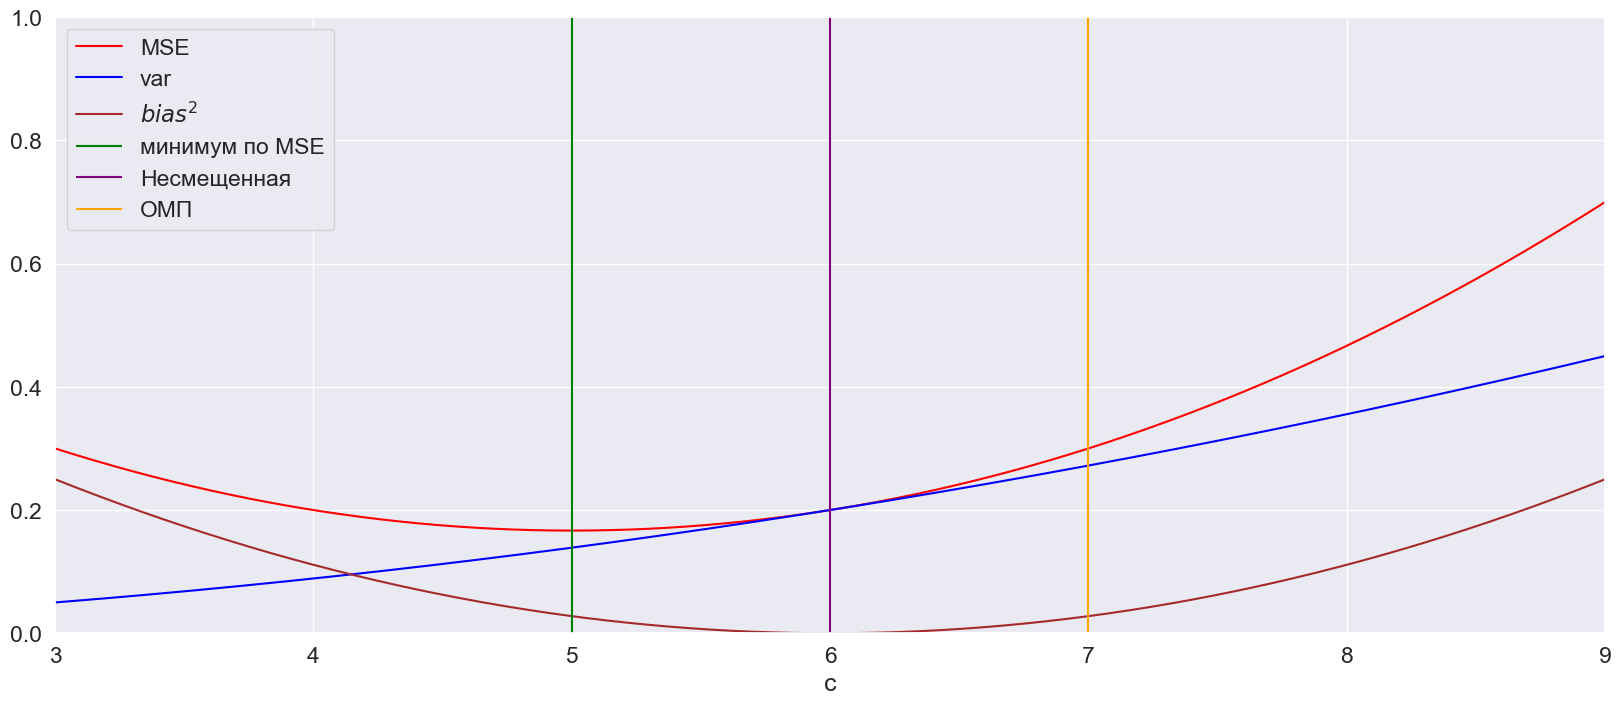

In [5]:
theta = 1
n = 7

grid_c = np.linspace(0, 15, 10000)
bias = theta * (grid_c + 1 - n) / (n - 1)
var = grid_c**2 * theta**2 / ((n - 1)**2 * (n - 2))
mse = bias**2 + var

plt.figure(figsize=(20, 8))
plt.plot(grid_c, mse, color = 'red', label = 'MSE')
plt.plot(grid_c, var, color = 'blue', label = 'var')
plt.plot(grid_c, bias**2, color = 'brown', label = '$bias^2$')
plt.vlines(grid_c[np.argmin(mse)], 0, 1, color = 'green', label = 'минимум по MSE')
plt.vlines(n - 1, 0, 1, color='purple', label = 'Несмещенная')
plt.vlines(n, 0, 1, color='orange', label = 'ОМП')
plt.xlim(3, 9)
plt.ylim(0, 1)
plt.xlabel('c')
plt.legend();

**Вывод:** Опять же компоненты квадратично зависят от $\theta$. Также три полученные оценки не совпадают, и здесь ближе к минимуму по MSE находится несмещенная оценка.

Сделайте вывод по результатам пунктов *a)*, *b)*, *c)*.

**Общий вывод:** Оценка при минимуме MSE, несмещенная и ОМП не совпали ни в одном из случаев. Где то ближе к оптимальной по MSE была ОМП, где-то - несмещенная. Во всех случаях компоненты квадратично зависели от $\theta$.




________
## Задача 2.
*a).* Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

In [ ]:
plt.plot(<сетка по параметру>, <функция риска>,
         label=<latex-метка>)  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(<тип функции потерь>, fontsize=16)
plt.ylim((0, <ограничение сверху>))

**Решение:**

In [8]:
def estimator_1(sample, n):
    return 2 * sample.mean(axis=1)

def estimator_2(sample, n):
    return (n + 1) * sample.min(axis=1)

def estimator_3(sample, n):
    return sample.min(axis=1) + sample.max(axis=1)

def estimator_4(sample, n):
    return (n + 1) / n * sample.max(axis=1)

def mse(theta_1, theta_2):
    return (theta_1 - theta_2)**2

def mae(theta_1, theta_2):
    return abs(theta_1 - theta_2)

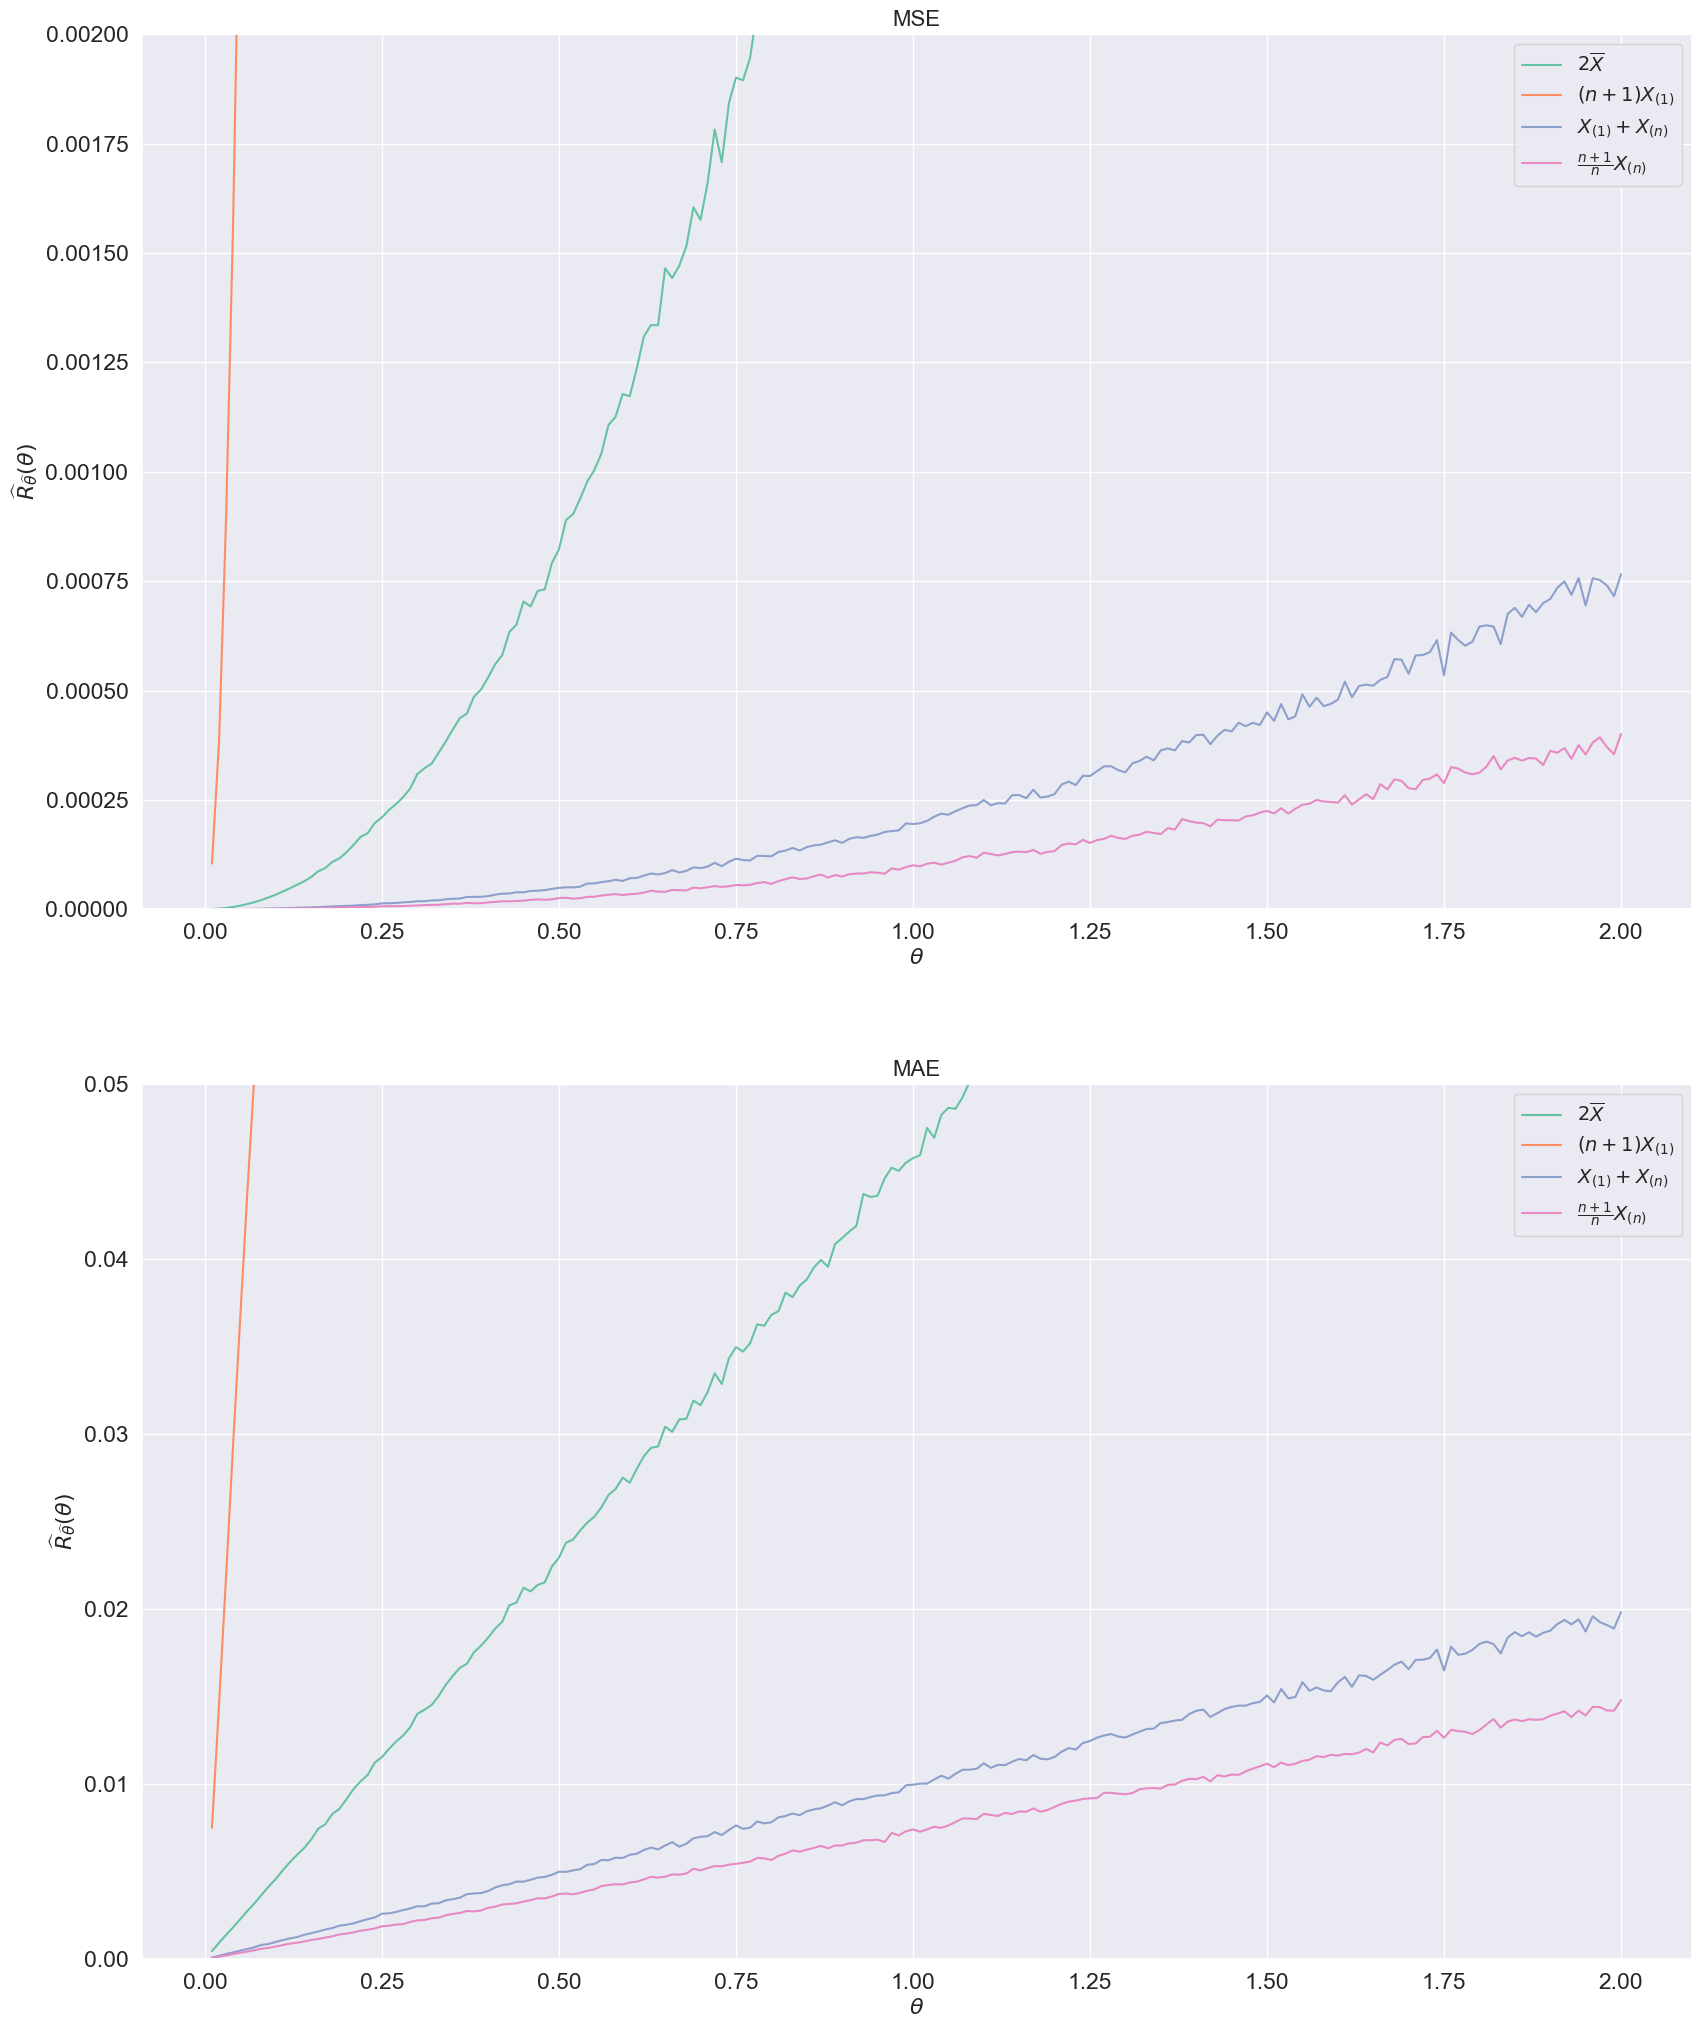

In [9]:
n = 5000
d = 100
grid_theta = np.linspace(0.01, 2, 200)
R_mse = [[], [], [], []]
R_mae = [[], [], [], []]
estimators = [estimator_1, estimator_2, estimator_3, estimator_4]
ylim = [(0, 0.002), (0, 0.05)]

for theta in grid_theta:
    sample = sps.uniform(scale=theta).rvs(size=(n, d))
    for i in range(4):
        R_mse[i].append(mse(estimators[i](sample, d), theta).sum() / n)
        R_mae[i].append(mae(estimators[i](sample, d), theta).sum() / n)
        
R = [R_mse, R_mae]
name_loss = ['MSE', 'MAE']
name_estimate = ['$2\\overline{X}$','$(n+1)X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{n+1}{n} X_{(n)}$']

plt.figure(figsize=(20, 25))
for i in range(2):
    plt.subplot(2, 1, i + 1)
    for j in range(4):
        plt.plot(grid_theta, R[i][j], label=name_estimate[j])
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.title(name_loss[i], fontsize=16)
    plt.ylim(ylim[i])

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** В обоих случаях наихудшая оценка - $(n + 1)X_{(1)}$. Получше в обоих случаях была оценка $2\overline{X}$, затем $X_{(1)} + X_{(n)}$ и затем $n + 1 / n *  X_{(n)}$. То есть в обоих случаях оценки лучше других соответственно. Также видно, что в первом случае зависимость квадратичная, а во втором линейная, что и логично, тк MSE и MAE соответственно.






___________
###  Задача 3. Hodges–Lehmann
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.

В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$

Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

In [17]:
def loss_mse(theta_1, theta_2):
    return (theta_1 - theta_2)**2

def loss_mae(theta_1, theta_2):
    return abs(theta_1 - theta_2)

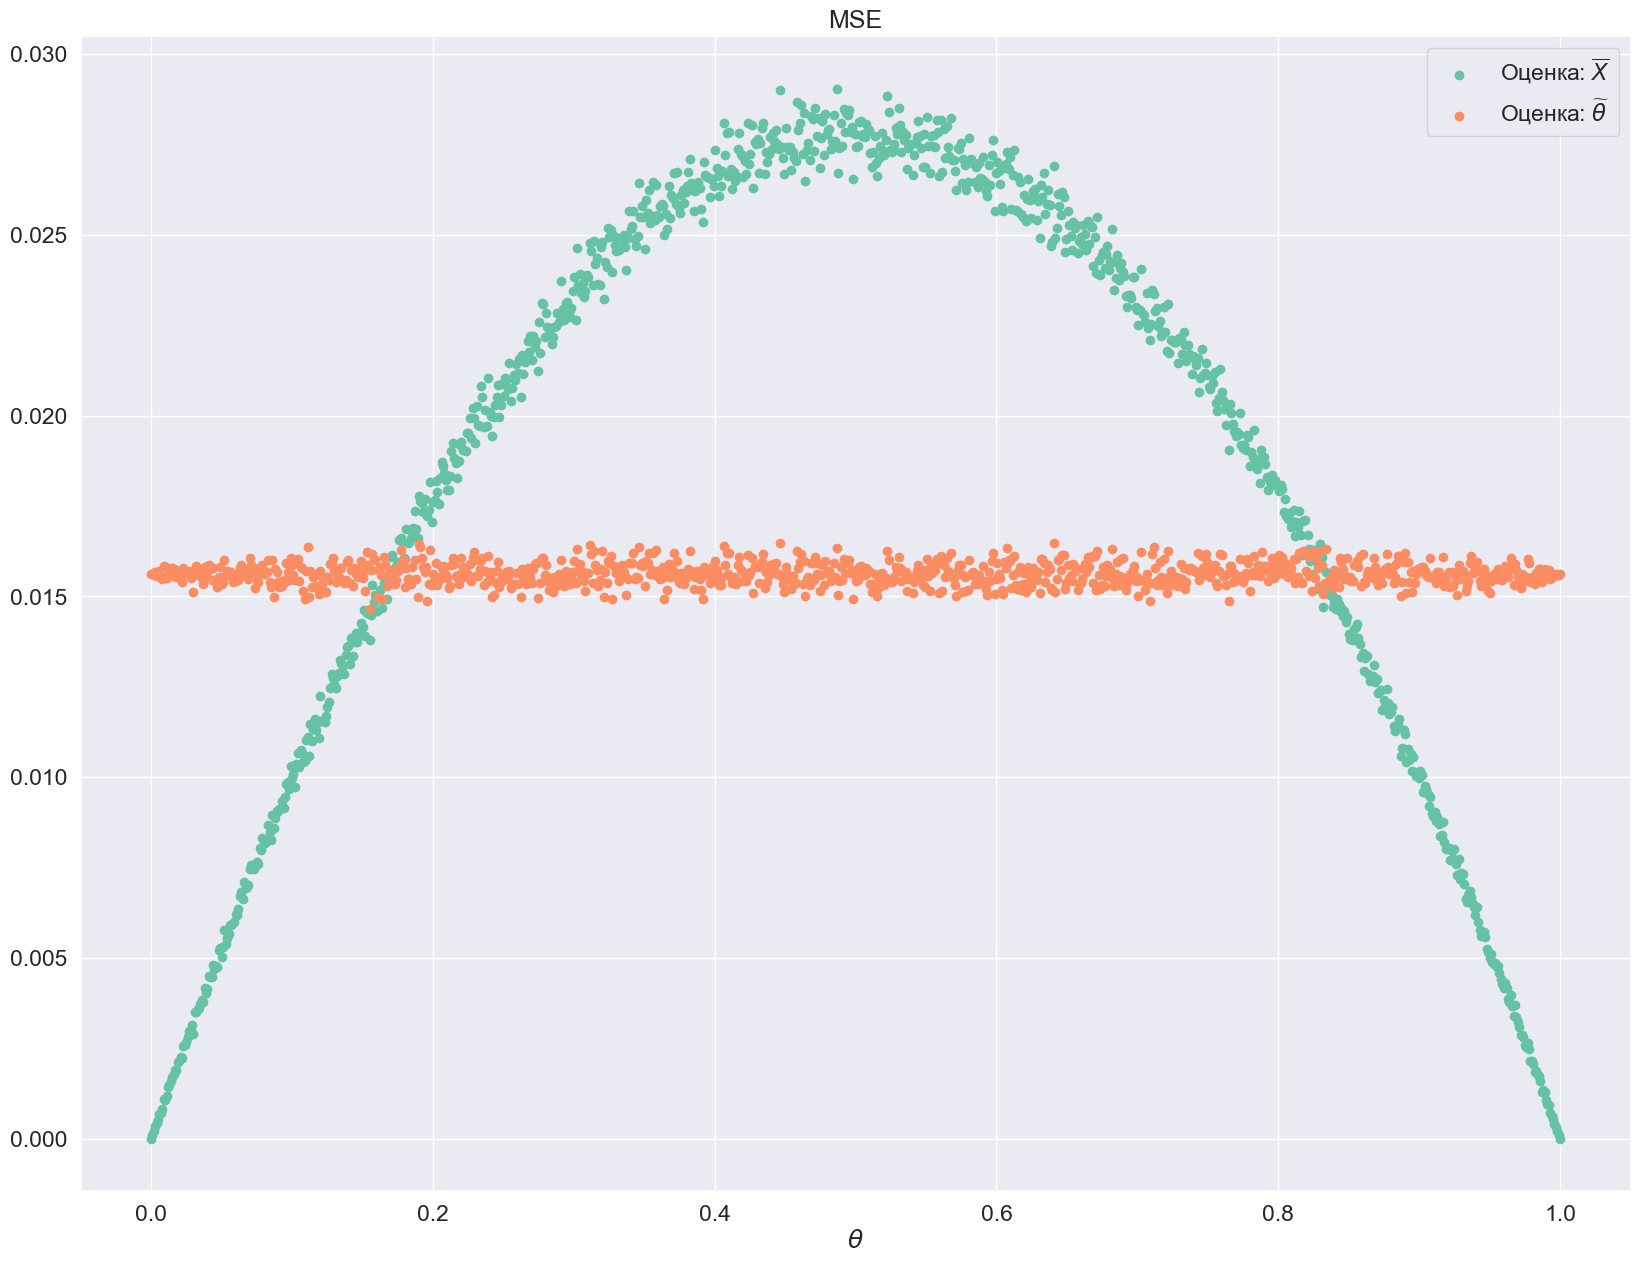

In [24]:
n = 9
d = 5000
grid_theta = np.linspace(0, 1, 1000)
mse = [[], []]

for theta in grid_theta:
    sample = sps.bernoulli(p=theta).rvs(size=(d, n))
    mse[0].append(loss_mse(sample.mean(axis=1), theta).sum() / d)
    mse[1].append(loss_mse(sample.mean(axis=1) + 1 / (1 + np.sqrt(n)) * (0.5 - sample.mean(axis=1)), theta).sum() / d)
    
plt.figure(figsize=(20, 15))
plt.scatter(grid_theta, mse[0], label='Оценка: $\overline{X}$')
plt.scatter(grid_theta, mse[1], label='Оценка: $\\widetilde{\\theta}}$')
plt.legend()
plt.title('MSE')
plt.xlabel('$\\theta$');

In [84]:
print('Доля параметров когда H-L лучше среднего относительно MSE: ', np.count_nonzero(np.array(mse[0]) > np.array(mse[1])) / len(mse[0]))

Доля параметров когда H-L лучше среднего относительно MSE:  0.659


**Ответ:** В данном случае видно, что оценка H-L лучше, чем MSE.

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [92]:
k = 1000
n = 9

sample_theta = sps.uniform(scale=1).rvs(size=k)
sample_x = sps.bernoulli(p=sample_theta.reshape(-1, 1)).rvs(size=(k, n))
estimator_1 = sample_x.mean(axis=1)
estimator_2 = sample_x.mean(axis=1) * 1 / (1 + np.sqrt(n)) * (0.5 - sample_x.mean(axis=1))

print('Доля параметров когда H-L лучше среднего относительно MSE: ',
    np.mean(abs(estimator_1 - sample_theta > abs(estimator_2 - sample_theta))))

Доля параметров когда H-L лучше среднего относительно MSE:  0.48


Не успел доделать

**Вывод:** <...>

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.

Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода прямоугольников. Сделайте выводы.

**Решение:**

In [ ]:
<...>

**Ответ:** <...>

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

In [ ]:
<...>

**Ответ:** <...>

**Вывод:** <...>